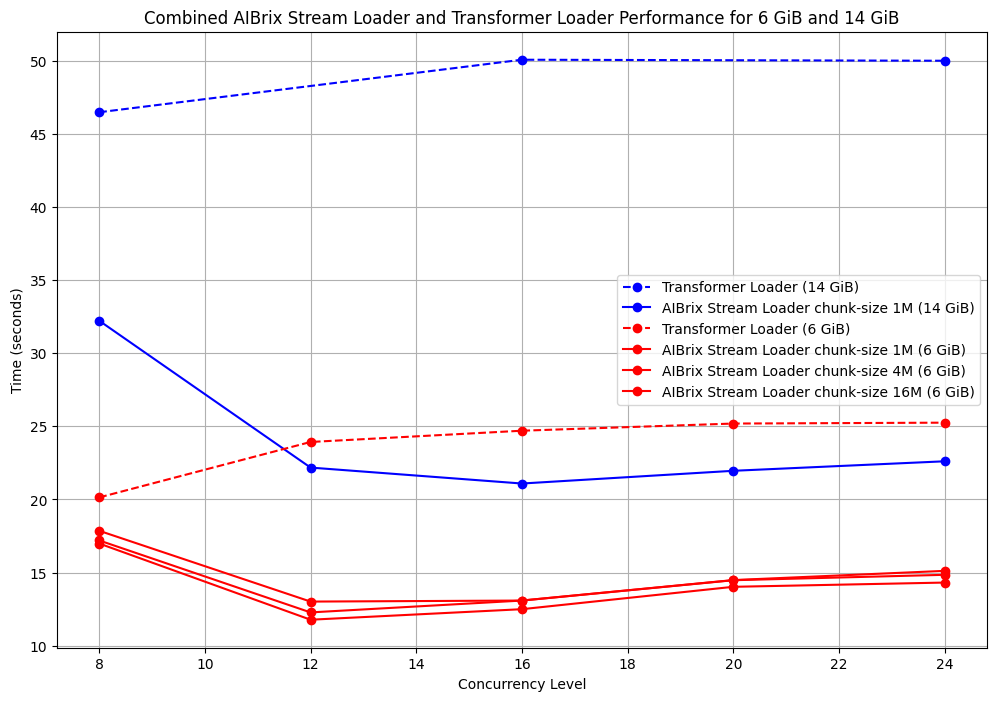

In [3]:
import matplotlib.pyplot as plt

# Data from both images with labels for 6 GiB and 14 GiB datasets

# Concurrency levels are consistent across both datasets
concurrency_levels = [8, 12, 16, 20, 24]

# AIBrix Stream Loader times for 6 GiB and 14 GiB datasets with chunk sizes (from both images)
aibrix_14GB = {
    '1M': [32.22, 22.18, 21.09, 21.96, 22.61],
}
aibrix_6GB = {
    '1M': [16.99, 11.78, 12.50, 14.03, 14.32],
    '4M': [17.20, 12.28, 13.09, 14.48, 14.85],
    '16M': [17.86, 13.02, 13.09, 14.49, 15.12]
}

# Transformer Loader times for 6 GiB and 14 GiB datasets
transformer_loader_14GB = [46.47, None, 50.06, None, 49.99]
transformer_loader_6GB = [20.14, 23.93, 24.70, 25.19, 25.25]

# Function to filter out None values for continuous plotting
def filter_none_values(concurrency_levels, times):
    filtered_concurrency = [c for c, t in zip(concurrency_levels, times) if t is not None]
    filtered_times = [t for t in times if t is not None]
    return filtered_concurrency, filtered_times

# Plotting the combined data
plt.figure(figsize=(12, 8))

# Plot for 14 GiB data
concurrency_filtered, times_filtered = filter_none_values(concurrency_levels, transformer_loader_14GB)
plt.plot(concurrency_filtered, times_filtered, marker='o', linestyle='--', label='Transformer Loader (14 GiB)', color='blue')

concurrency_filtered, times_filtered = filter_none_values(concurrency_levels, aibrix_14GB['1M'])
plt.plot(concurrency_filtered, times_filtered, marker='o', label='AIBrix Stream Loader chunk-size 1M (14 GiB)', color='blue')

# Plot for 6 GiB data
concurrency_filtered, times_filtered = filter_none_values(concurrency_levels, transformer_loader_6GB)
plt.plot(concurrency_levels, transformer_loader_6GB, marker='o', linestyle='--', label='Transformer Loader (6 GiB)', color='red')

for chunk_size, times in aibrix_6GB.items():
    plt.plot(concurrency_levels, times, marker='o', label=f'AIBrix Stream Loader chunk-size {chunk_size} (6 GiB)', color='red')

# Adding labels and title
plt.xlabel("Concurrency Level")
plt.ylabel("Time (seconds)")
plt.title("Combined AIBrix Stream Loader and Transformer Loader Performance for 6 GiB and 14 GiB")
plt.legend()
plt.grid()

# Show plot
plt.show()
